In [1]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques / Date / Signal
import scipy.stats as stats
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_daily = pd.read_csv("data/modified_data/merged_daily_regional.csv")
df_hourly = pd.read_csv("data/modified_data/merged_hourly_regional.csv")

In [3]:
df_daily["date"] = pd.to_datetime(df_daily["date"])
df_hourly["datetime_hour"] = pd.to_datetime(df_hourly["datetime_hour"])

In [4]:
print(df_daily.dtypes["date"])  # -> datetime64[ns]
print(df_hourly.dtypes["datetime_hour"])  # -> datetime64[ns]

datetime64[ns]
datetime64[ns]


In [5]:
df_daily.head()

date  insee_region  conso_elec_mw  conso_gaz_mw  temperature_2m_max  \
0 2013-01-01            11       389597.0       53348.0                 8.7   
1 2013-01-01            24       100846.0       45695.0                 9.6   
2 2013-01-01            27       108098.0       65331.0                 9.0   
3 2013-01-01            28       152060.0      110271.0                 8.9   
4 2013-01-01            32       248073.0      165424.0                 8.0   

   temperature_2m_min  precipitation_sum  weather_code  \
0                 3.8                8.7            61   
1                 5.5                6.0            61   
2                 4.4                6.4            55   
3                 3.9                8.1            55   
4                 3.7                8.0            53   

   apparent_temperature_max  apparent_temperature_min  ...  \
0                       5.7                       0.3  ...   
1                       6.7                       2.1  ...   
2                       6.1                       0.9  ...   
3                       5.8                       0.6  ...   
4                       5.4                       0.5  ...   

   precipitation_hours           sunrise            sunset sunshine_duration  \
0                 13.0  2013-01-01T09:44  2013-01-01T18:04          24366.94   
1                 11.0  2013-01-01T09:55  2013-01-01T18:13          23816.68   
2                 14.0  2013-01-01T09:51  2013-01-01T18:07          24513.07   
3                 13.0  2013-01-01T09:41  2013-01-01T18:10          25155.29   
4                 15.0  2013-01-01T09:27  2013-01-01T18:00              0.00   

  daylight_duration  wind_speed_10m_max  wind_gusts_10m_max  \
0          30049.78                25.0                48.6   
1          29867.77                20.4                45.7   
2          29719.84                27.1                53.6   
3          30508.68                25.5                49.3   
4          30781.38                25.0                50.0   

   wind_direction_10m_dominant  shortwave_radiation_sum  \
0                          248                     3.55   
1                          269                     4.01   
2                          261                     3.87   
3                          246                     3.82   
4                          213                     0.96   

   et0_fao_evapotranspiration  
0                        0.59  
1                        0.62  
2                        0.52  
3                        0.52  
4                        0.61  

[5 rows x 22 columns]

In [6]:
df_daily.shape

(49644, 22)

In [7]:
df_daily.isnull().sum()

date                           0
insee_region                   0
conso_elec_mw                  0
conso_gaz_mw                   0
temperature_2m_max             0
temperature_2m_min             0
precipitation_sum              0
weather_code                   0
apparent_temperature_max       0
apparent_temperature_min       0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
sunrise                        0
sunset                         0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

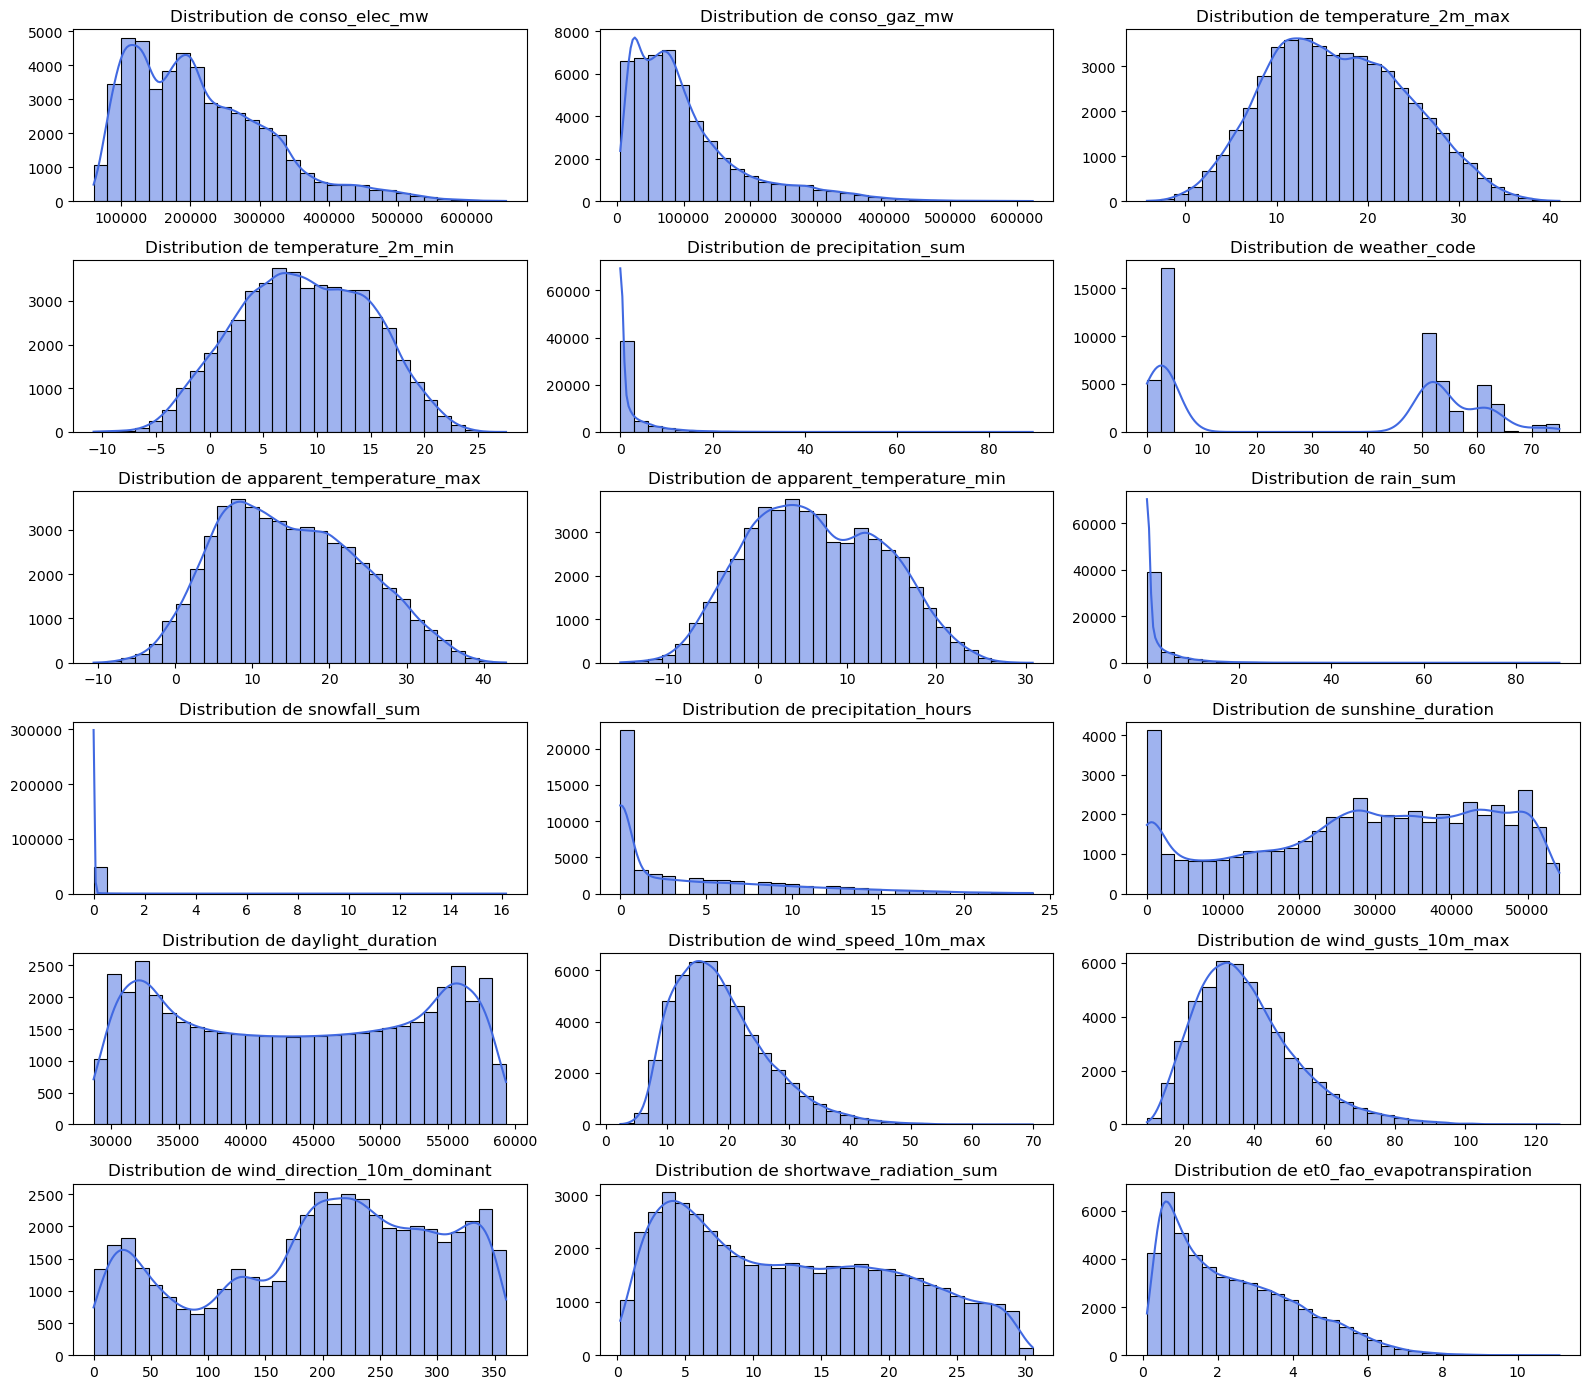

In [8]:
df_copy_daily = df_daily.copy()

# Suppression des colonnes non numériques si nécessaire
drop_cols = ["date", "insee_region"]
df_copy_daily = df_copy_daily.drop(columns=[col for col in drop_cols if col in df_copy_daily.columns])

# Sélection des colonnes numériques
num_cols = df_copy_daily.select_dtypes(include=["float64", "int64"]).columns

# Affichage des distributions
plt.figure(figsize=(16, 14))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) - 1) // 3 + 1, 3, i)  # lignes dynamiques par groupes de 3
    sns.histplot(df_copy_daily[col], kde=True, bins=30, color="royalblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

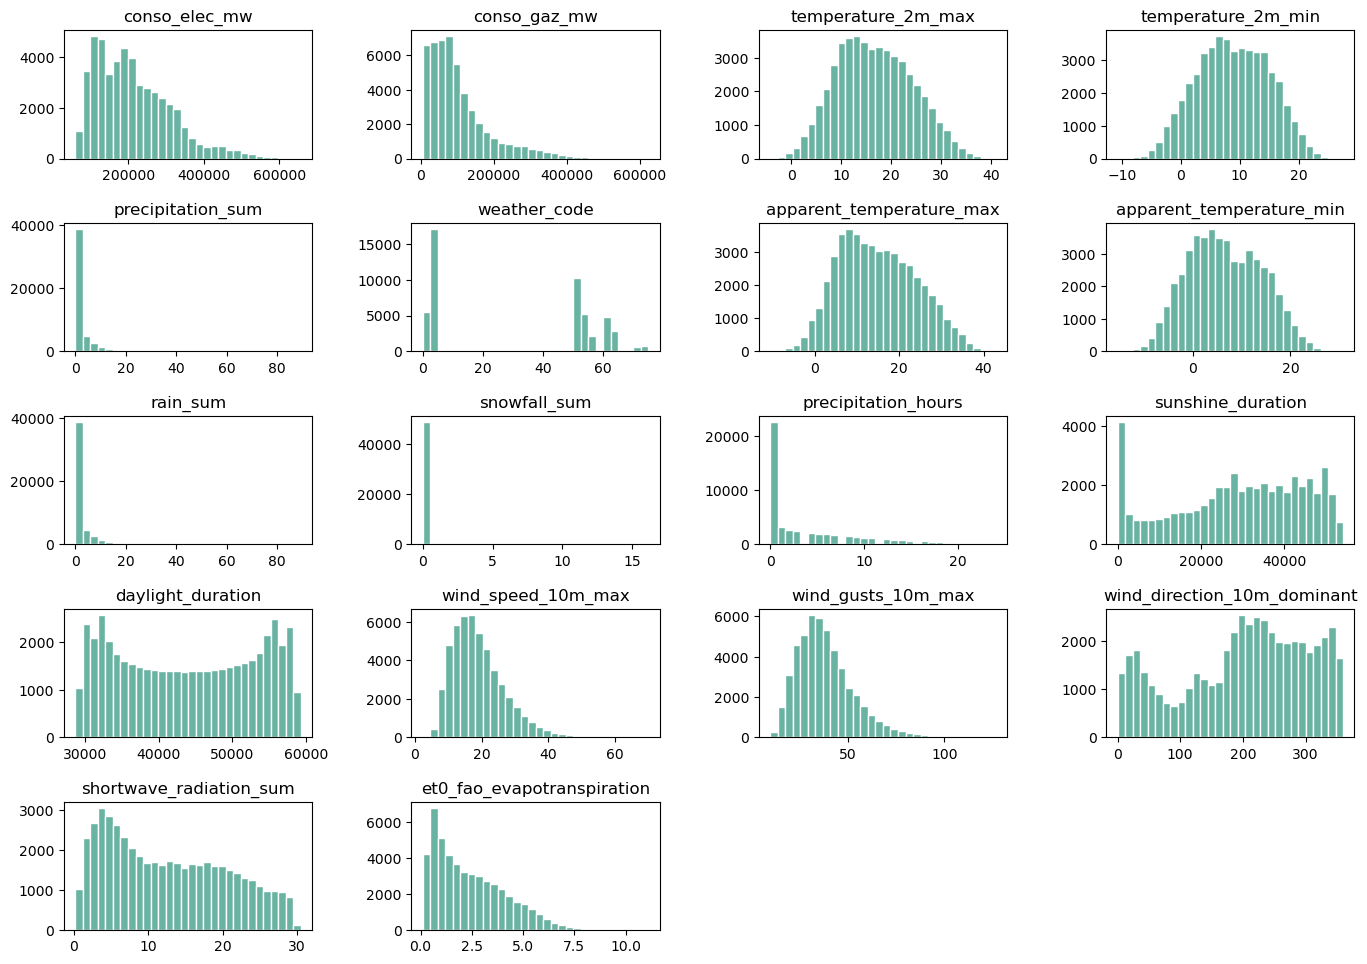

In [9]:
df_copy_daily.hist(figsize=(14,10), bins=30, edgecolor='white', color='#69b3a2', grid=False)
plt.tight_layout(pad=2.0)
plt.gcf().set_facecolor('white')
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

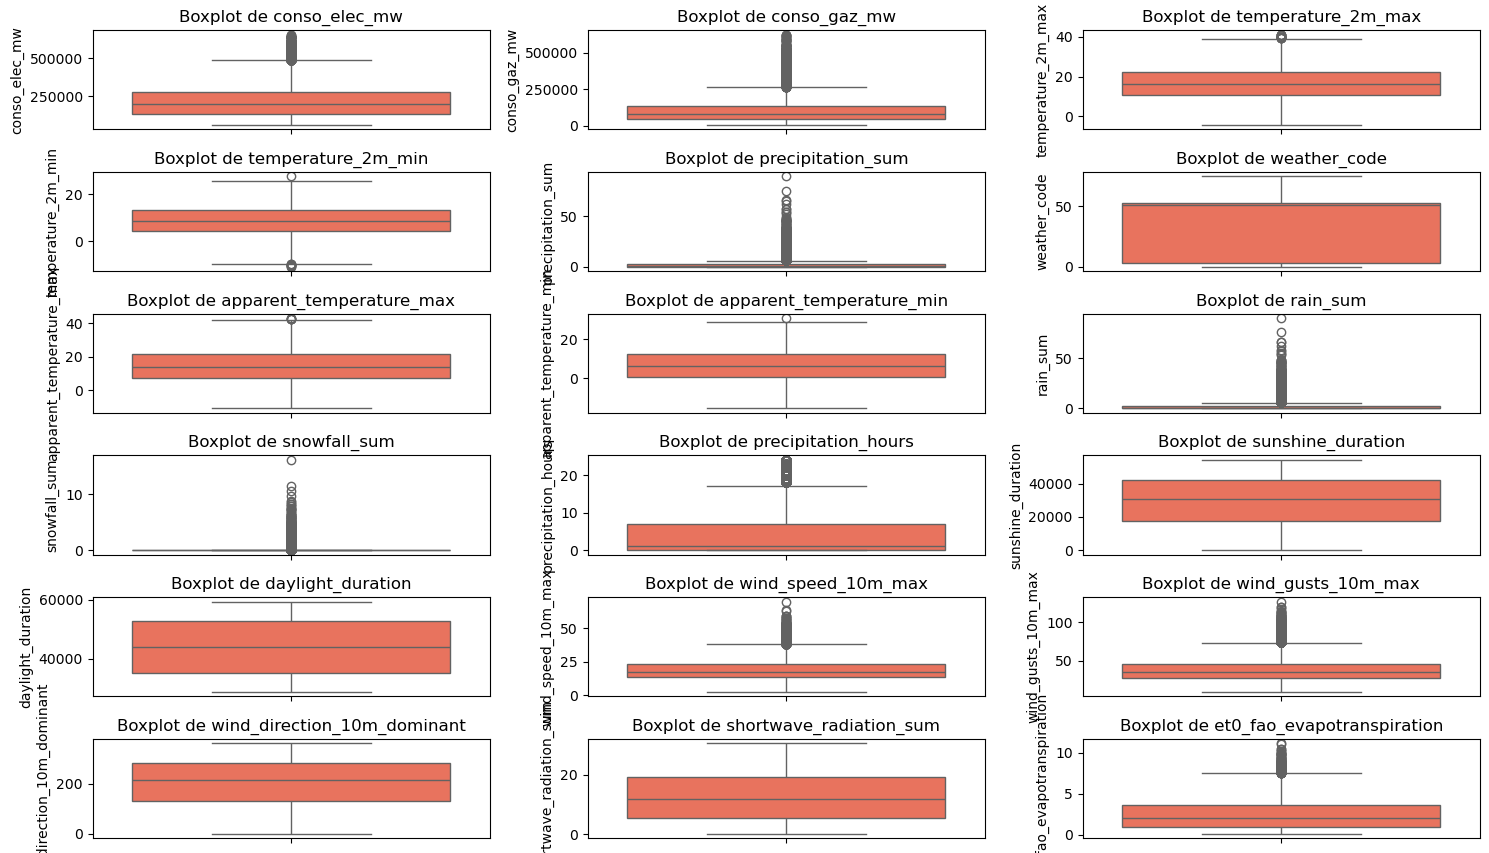

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(y=df_copy_daily[col], color="tomato")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

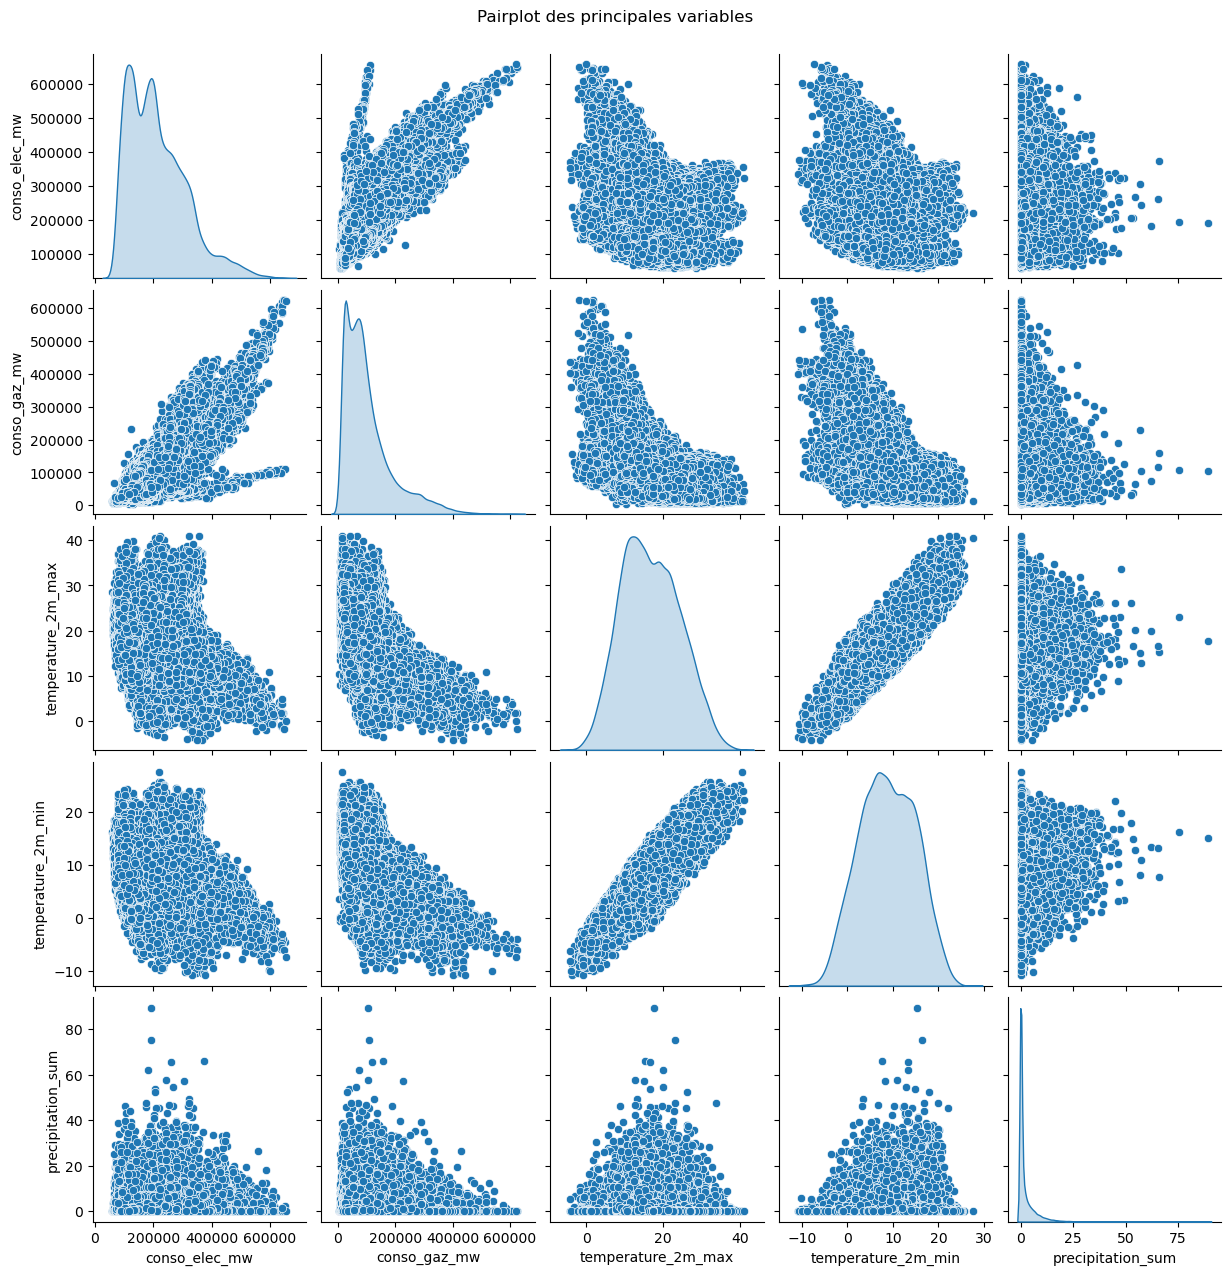

In [11]:
subset_cols = ["conso_elec_mw", "conso_gaz_mw", "temperature_2m_max", "temperature_2m_min", "precipitation_sum"]

sns.pairplot(df_copy_daily[subset_cols], diag_kind="kde")
plt.suptitle("Pairplot des principales variables", y=1.02)
plt.show()


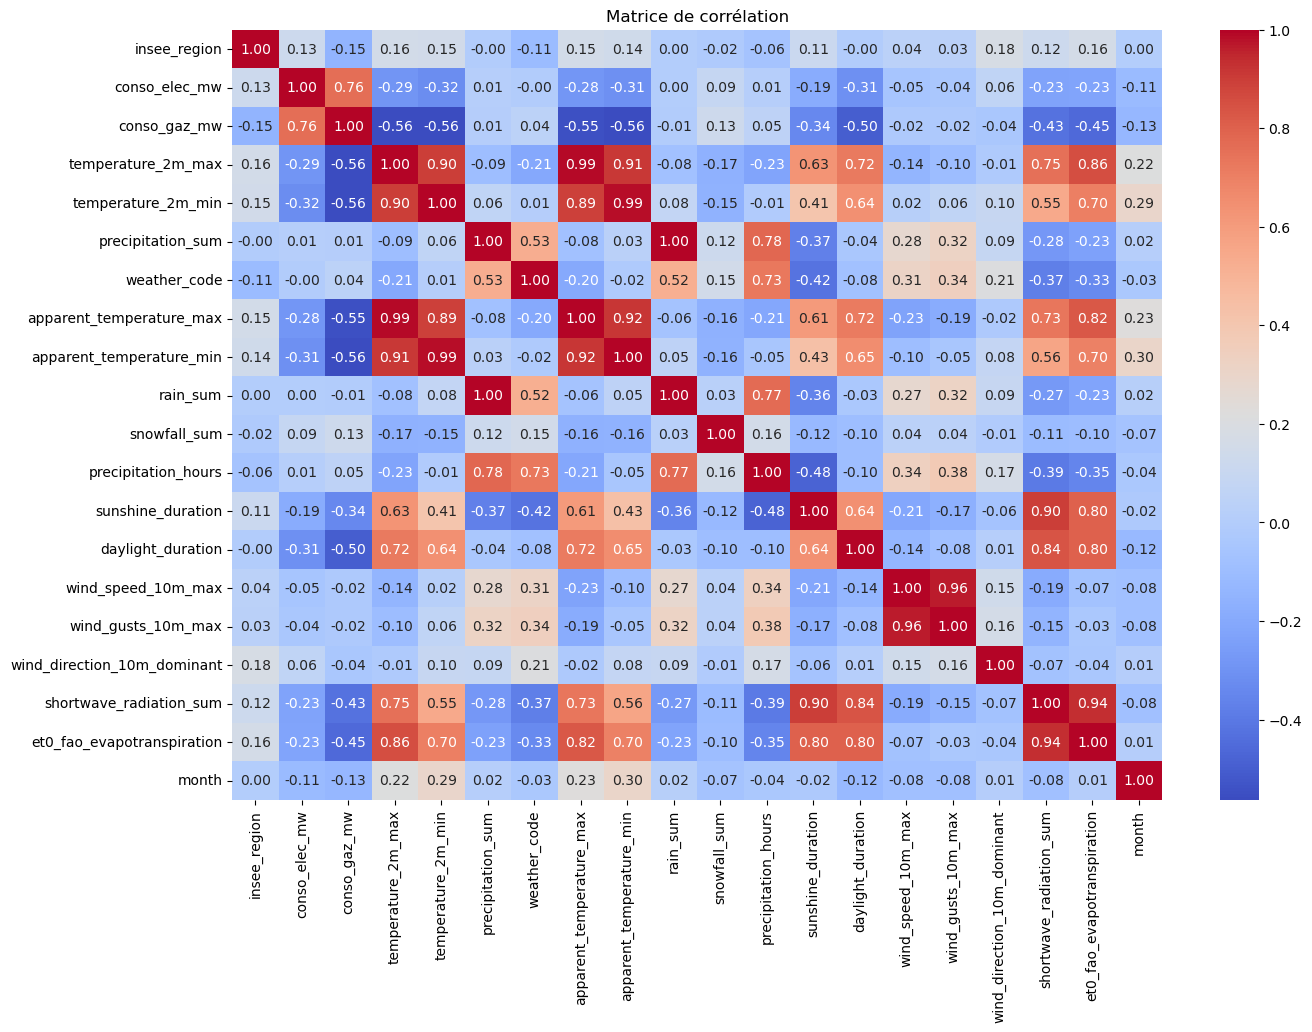

In [18]:
plt.figure(figsize=(15, 10))
corr = df_daily.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

C:\Users\arnov\AppData\Local\Temp\ipykernel_4148\1634520007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_d")


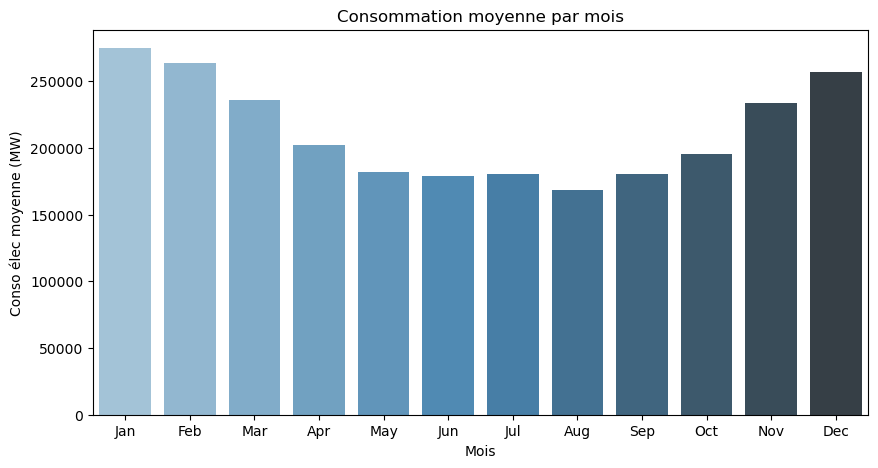

In [19]:
df_daily["month"] = pd.to_datetime(df_daily["date"]).dt.month
monthly_avg = df_daily.groupby("month")["conso_elec_mw"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_d")
plt.title("Consommation moyenne par mois")
plt.xlabel("Mois")
plt.ylabel("Conso élec moyenne (MW)")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

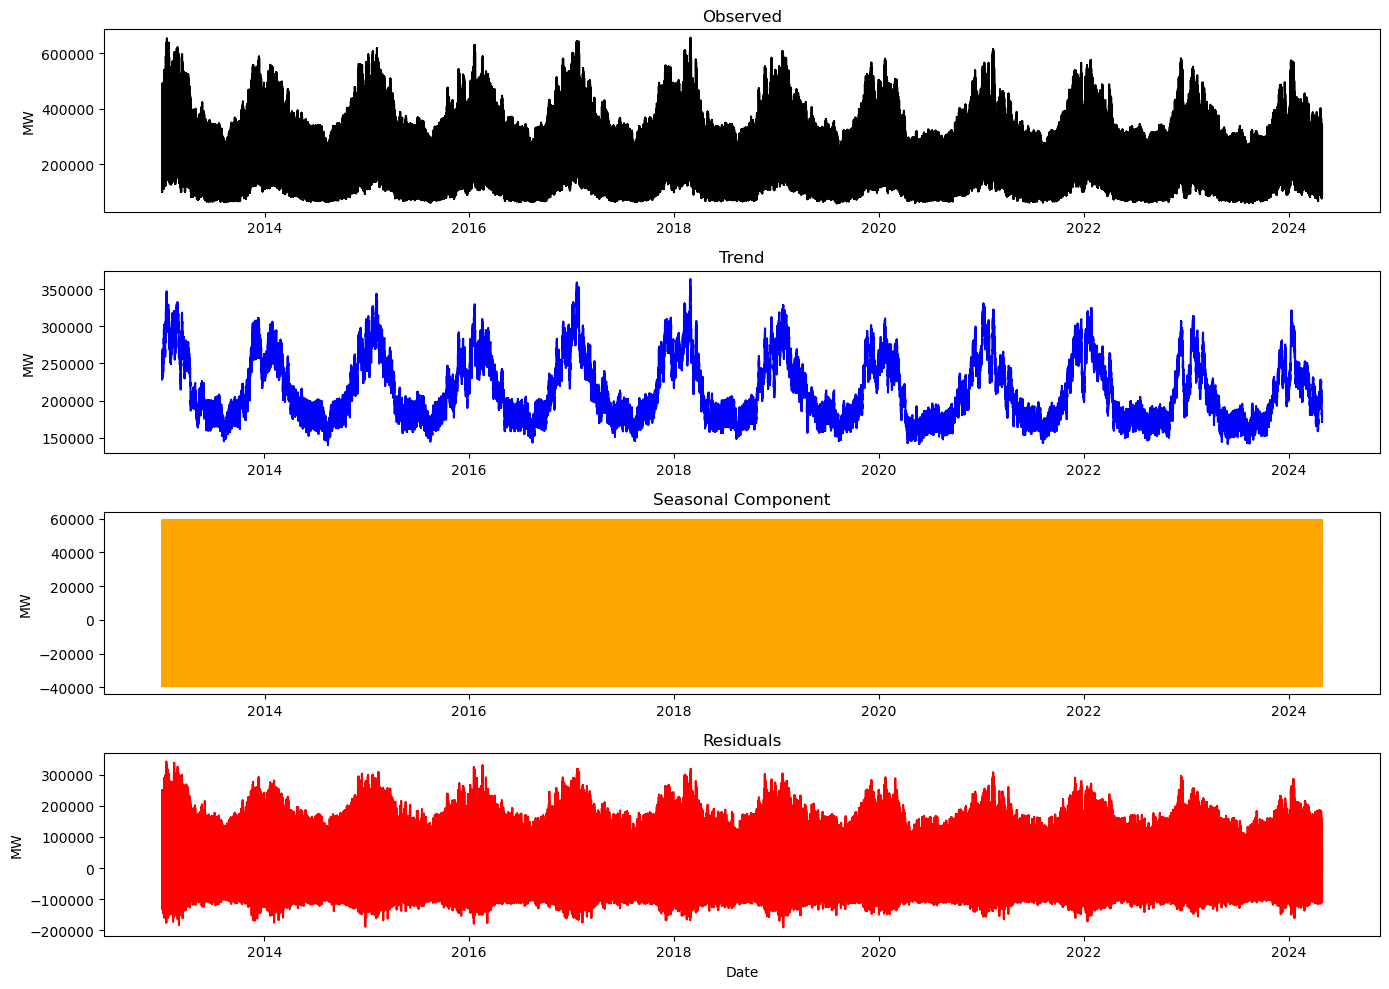

In [ ]:
df_trend = df_daily.copy()
df_trend = df_trend.sort_values("date")
df_trend["date"] = pd.to_datetime(df_trend["date"])
df_trend.set_index("date", inplace=True)

decomposed = seasonal_decompose(df_trend['conso_elec_mw'], model='additive', period=30)

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposed.observed, label='Observed', color='black')
plt.title('Observed')
plt.ylabel("MW")

plt.subplot(4, 1, 2)
plt.plot(decomposed.trend, label='Trend', color='blue')
plt.title('Trend')
plt.ylabel("MW")

plt.subplot(4, 1, 3)
plt.plot(decomposed.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.ylabel("MW")

plt.subplot(4, 1, 4)
plt.plot(decomposed.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.ylabel("MW")
plt.xlabel("Date")

plt.tight_layout()
plt.show()

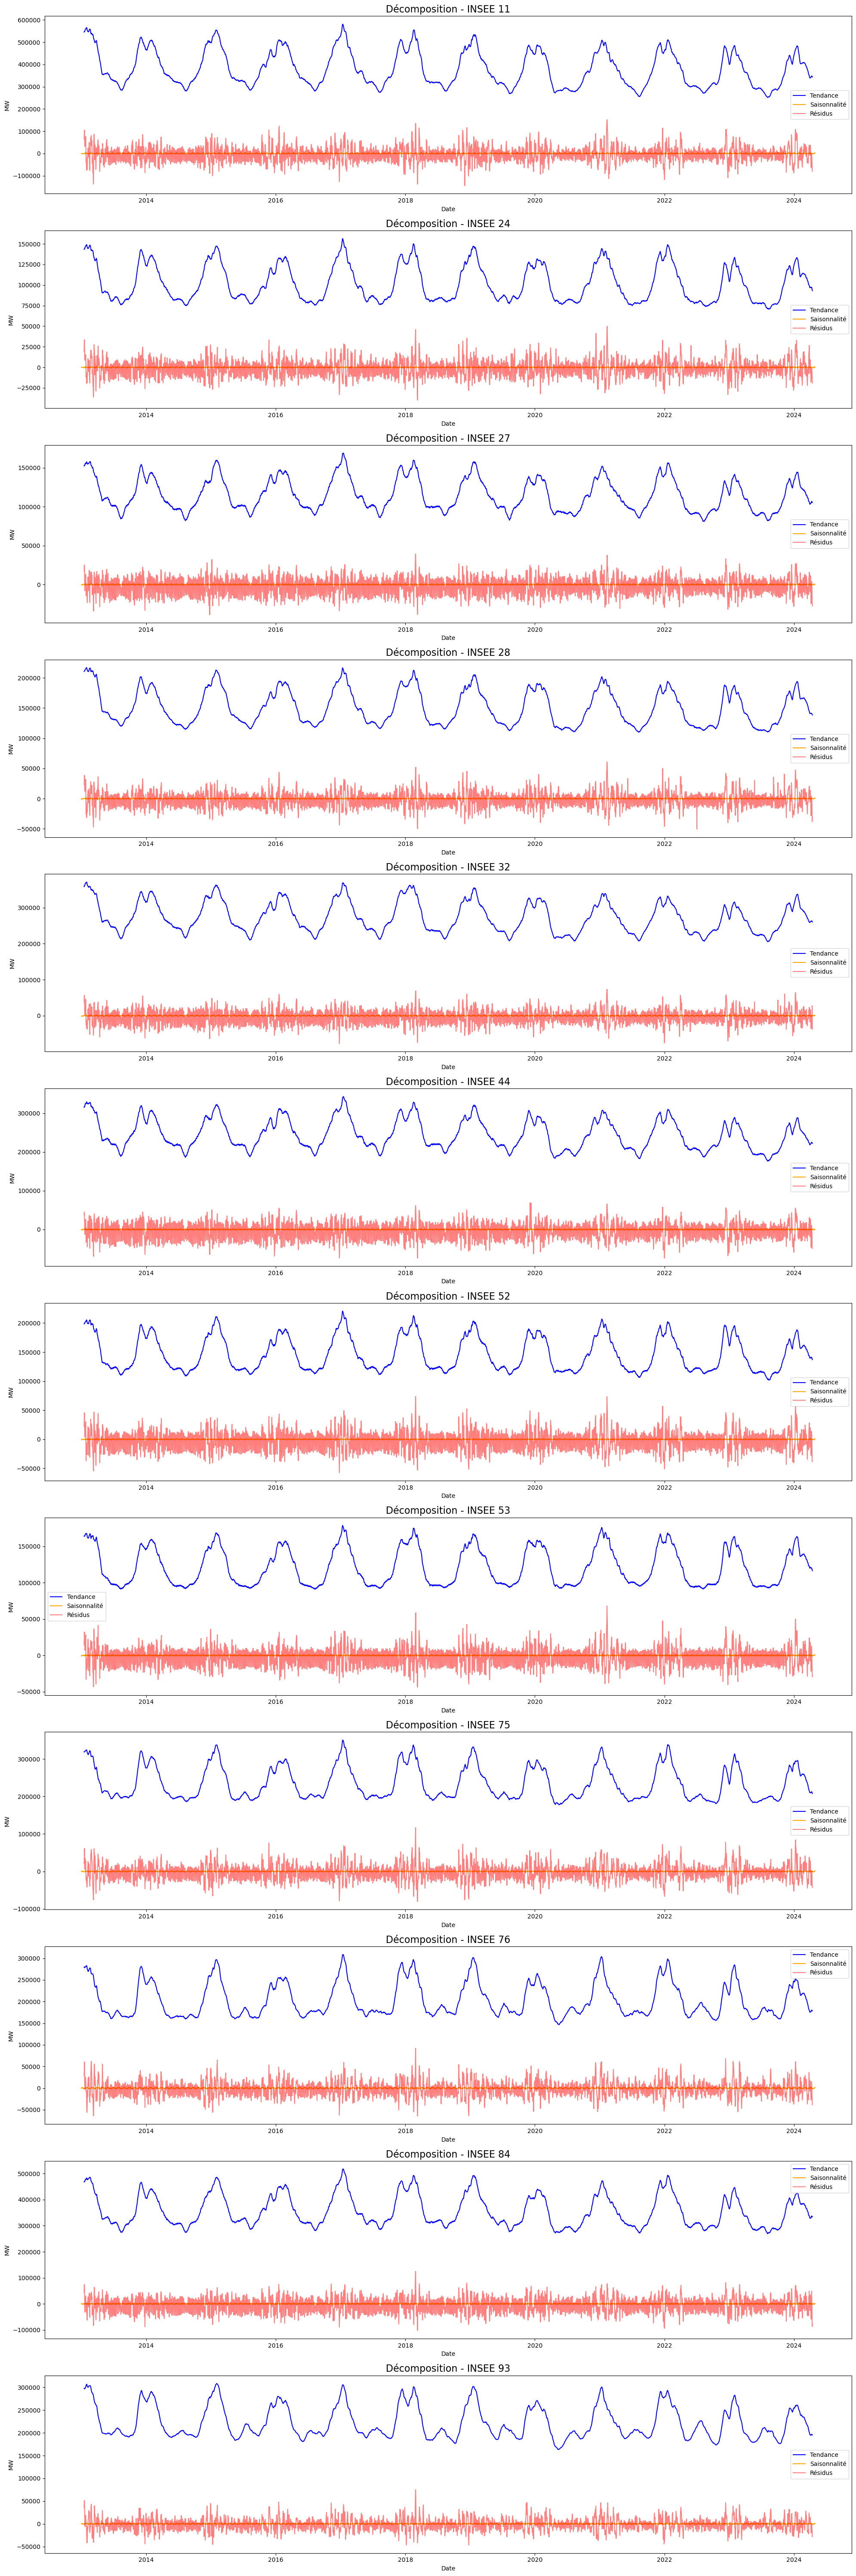

In [13]:
df_plot = df_daily.copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot = df_plot.sort_values(["insee_region", "date"])

# Récupère les régions disponibles
regions = df_plot["insee_region"].unique()

# Plot sur plusieurs sous-graphes
f, axs = plt.subplots(len(regions), 1, figsize=(20, 5 * len(regions)))

for i, region in enumerate(regions):
    df_region = df_plot[df_plot["insee_region"] == region].set_index("date")

    # Évite les erreurs si trop peu de données
    if len(df_region) < 60:
        axs[i].text(0.5, 0.5, f"Trop peu de données pour la région {region}", ha='center')
        continue

    decomposition = seasonal_decompose(df_region['conso_elec_mw'], model='additive', period=30)
    
    sns.lineplot(x=decomposition.trend.index, y=decomposition.trend.values, ax=axs[i], label="Tendance", color="blue")
    sns.lineplot(x=decomposition.seasonal.index, y=decomposition.seasonal.values, ax=axs[i], label="Saisonnalité", color="orange")
    sns.lineplot(x=decomposition.resid.index, y=decomposition.resid.values, ax=axs[i], label="Résidus", color="red", alpha=0.5)

    axs[i].set_title(f"Décomposition - INSEE {region}", fontsize=16)
    axs[i].legend()
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("MW")

plt.tight_layout()
plt.show()

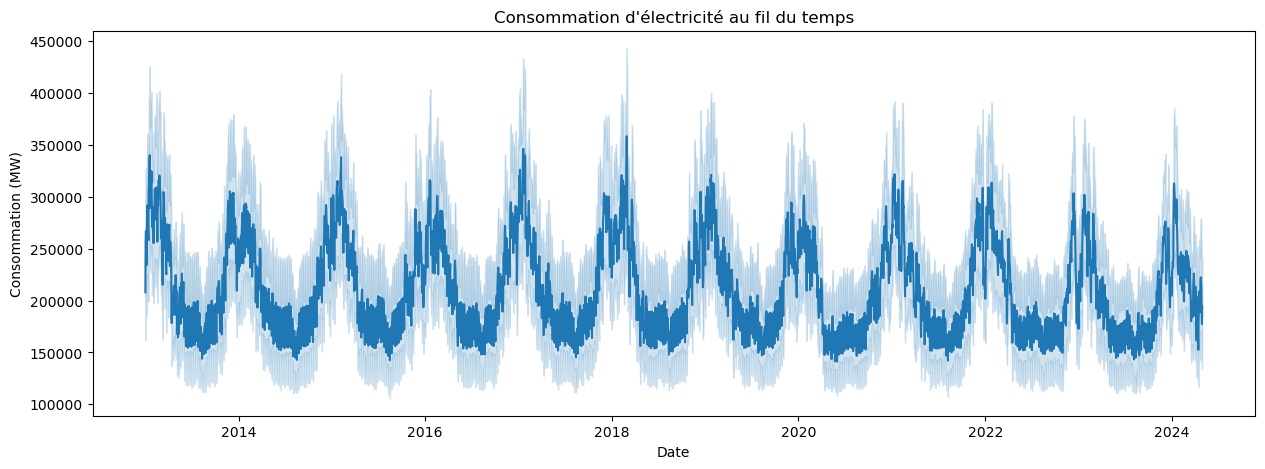

In [14]:

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_daily, x='date', y='conso_elec_mw')
plt.title('Consommation d\'électricité au fil du temps')
plt.xlabel('Date')
plt.ylabel('Consommation (MW)')
plt.show()

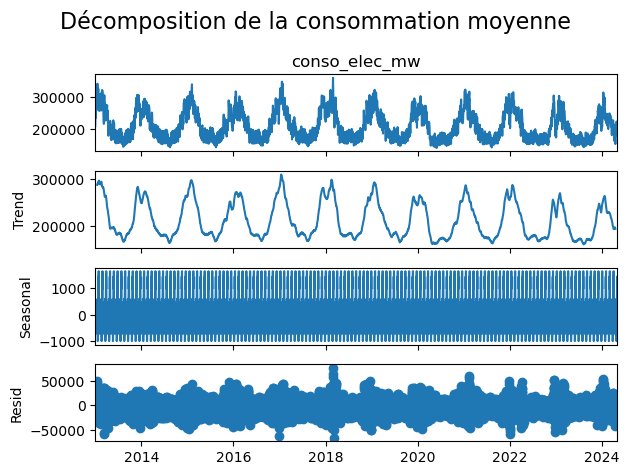

In [17]:
df_decomp = df_daily.groupby("date")["conso_elec_mw"].mean().dropna()
df_decomp = df_decomp.asfreq("D")

result = seasonal_decompose(df_decomp, model='additive', period=30)
result.plot()
plt.suptitle("Décomposition de la consommation moyenne", fontsize=16)
plt.tight_layout()
plt.show()